<a href="https://colab.research.google.com/github/TheKnight909/T5/blob/main/Weekly_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [2]:
df=pd.read_csv('RTA_Dataset.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [4]:
df.shape

(12316, 32)

In [5]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [7]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [8]:
df.describe(include="object")

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,...,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,...,13,4,3,6,4,7,5,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,...,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415


In [9]:
df.duplicated().sum()

0

In [10]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}","\n")

Unique values in column 'Time': ['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00'] 

Unique values in column 'Day_of_week': ['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday'] 

Unique values in column 'Age_band_of_driver': ['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown'] 

Unique values in column 'Sex_of_driver': ['Male' 'Female' 'Unknown'] 

Unique values in column 'Educational_level': ['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading'] 

Unique values in column 'Vehicle_driver_relation': ['Employee' 'Unknown' 'Owner' nan 'Other'] 

Unique values in column 'Driving_experience': ['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr'
 'unknown'] 

Unique values in column 'Type_of_vehicle': ['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)' nan
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'R

In [11]:
df = df.replace('Unknown', np.nan)
df = df.replace('unknown', np.nan)
df = df.replace('na', np.nan)

In [12]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,1548
Sex_of_driver,178
Educational_level,841
Vehicle_driver_relation,593
Driving_experience,862
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,6811


In [13]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}","\n")

Unique values in column 'Time': ['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00'] 

Unique values in column 'Day_of_week': ['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday'] 

Unique values in column 'Age_band_of_driver': ['18-30' '31-50' 'Under 18' 'Over 51' nan] 

Unique values in column 'Sex_of_driver': ['Male' 'Female' nan] 

Unique values in column 'Educational_level': ['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Illiterate' 'Writing & reading'] 

Unique values in column 'Vehicle_driver_relation': ['Employee' nan 'Owner' 'Other'] 

Unique values in column 'Driving_experience': ['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr'] 

Unique values in column 'Type_of_vehicle': ['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)' nan
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Moto

## Data Preprocessing


Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [14]:
for col in df.columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [15]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,0
Service_year_of_vehicle,0


In [16]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}","\n")

Unique values in column 'Time': ['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00'] 

Unique values in column 'Day_of_week': ['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday'] 

Unique values in column 'Age_band_of_driver': ['18-30' '31-50' 'Under 18' 'Over 51'] 

Unique values in column 'Sex_of_driver': ['Male' 'Female'] 

Unique values in column 'Educational_level': ['Above high school' 'Junior high school' 'Elementary school'
 'High school' 'Illiterate' 'Writing & reading'] 

Unique values in column 'Vehicle_driver_relation': ['Employee' 'Owner' 'Other'] 

Unique values in column 'Driving_experience': ['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' 'No Licence' 'Below 1yr'] 

Unique values in column 'Type_of_vehicle': ['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)'
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle

In [17]:
df["Fitness_of_casuality"].value_counts()

,count
Fitness_of_casuality,
Normal,12243
NormalNormal,19
Deaf,18
Other,18
Blind,18


In [18]:
df.shape

(12316, 32)

In [19]:
df = df[df['Fitness_of_casuality'] != 'NormalNormal']

In [20]:
df["Fitness_of_casuality"].value_counts()

,count
Fitness_of_casuality,
Normal,12243
Deaf,18
Other,18
Blind,18


In [21]:
df.shape

(12297, 32)

In [22]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,2-5yrs,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,2-5yrs,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,5-10yrs,...,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,2-5yrs,...,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,18-30,Male,Elementary school,Employee,5-10yr,Automobile,Owner,2-5yrs,...,Other,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [23]:
for column in df.columns:
  if df[column].dtype == 'object':
    df[column] = df[column].str.strip()
    df[column] = df[column].str.lower()


for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}","\n")


Unique values in column 'Time': ['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00'] 

Unique values in column 'Day_of_week': ['monday' 'sunday' 'friday' 'wednesday' 'saturday' 'thursday' 'tuesday'] 

Unique values in column 'Age_band_of_driver': ['18-30' '31-50' 'under 18' 'over 51'] 

Unique values in column 'Sex_of_driver': ['male' 'female'] 

Unique values in column 'Educational_level': ['above high school' 'junior high school' 'elementary school'
 'high school' 'illiterate' 'writing & reading'] 

Unique values in column 'Vehicle_driver_relation': ['employee' 'owner' 'other'] 

Unique values in column 'Driving_experience': ['1-2yr' 'above 10yr' '5-10yr' '2-5yr' 'no licence' 'below 1yr'] 

Unique values in column 'Type_of_vehicle': ['automobile' 'public (> 45 seats)' 'lorry (41?100q)'
 'public (13?45 seats)' 'lorry (11?40q)' 'long lorry' 'public (12 seats)'
 'taxi' 'pick up upto 10q' 'stationwagen' 'ridden horse' 'other' 'bajaj'
 'turbo' 'motorcycle' 'special vehicle

In [24]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,monday,18-30,male,above high school,employee,1-2yr,automobile,owner,above 10yr,...,going straight,driver or rider,male,18-30,3,driver,normal,not a pedestrian,moving backward,slight injury
1,17:02:00,monday,31-50,male,junior high school,employee,above 10yr,public (> 45 seats),owner,5-10yrs,...,going straight,driver or rider,male,18-30,3,driver,normal,not a pedestrian,overtaking,slight injury
2,17:02:00,monday,18-30,male,junior high school,employee,1-2yr,lorry (41?100q),owner,2-5yrs,...,going straight,driver or rider,male,31-50,3,driver,normal,not a pedestrian,changing lane to the left,serious injury
3,1:06:00,sunday,18-30,male,junior high school,employee,5-10yr,public (> 45 seats),governmental,2-5yrs,...,going straight,pedestrian,female,18-30,3,driver,normal,not a pedestrian,changing lane to the right,slight injury
4,1:06:00,sunday,18-30,male,junior high school,employee,2-5yr,automobile,owner,5-10yrs,...,going straight,driver or rider,male,18-30,3,driver,normal,not a pedestrian,overtaking,slight injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,wednesday,31-50,male,junior high school,employee,2-5yr,lorry (11?40q),owner,2-5yrs,...,going straight,driver or rider,male,18-30,3,driver,normal,not a pedestrian,no distancing,slight injury
12312,18:00:00,sunday,18-30,male,elementary school,employee,5-10yr,automobile,owner,2-5yrs,...,other,driver or rider,male,18-30,3,driver,normal,not a pedestrian,no distancing,slight injury
12313,13:55:00,sunday,over 51,male,junior high school,employee,5-10yr,bajaj,owner,2-5yrs,...,other,driver or rider,male,31-50,3,driver,normal,not a pedestrian,changing lane to the right,serious injury
12314,13:55:00,sunday,18-30,female,junior high school,employee,above 10yr,lorry (41?100q),owner,2-5yrs,...,other,driver or rider,male,18-30,3,driver,normal,not a pedestrian,driving under the influence of drugs,slight injury


In [25]:
df.duplicated().sum()

0

In [26]:
df["Time"].head()

,Time
0,17:02:00
1,17:02:00
2,17:02:00
3,1:06:00
4,1:06:00


In [27]:
df['Time']= pd.to_datetime(df['Time'])
df['Time'] = df['Time'].dt.hour

<ipython-input-27-85f618bebcd4>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time']= pd.to_datetime(df['Time'])


In [28]:
df.reset_index(drop=True, inplace=True)

In [29]:
df["Time"].head()

,Time
0,17
1,17
2,17
3,1
4,1


In [30]:
df.dtypes

,0
Time,int32
Day_of_week,object
Age_band_of_driver,object
Sex_of_driver,object
Educational_level,object
Vehicle_driver_relation,object
Driving_experience,object
Type_of_vehicle,object
Owner_of_vehicle,object
Service_year_of_vehicle,object


In [65]:
# Label encode categorical variables
label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])


In [67]:
df.dtypes

,0
Time,int32
Day_of_week,int64
Age_band_of_driver,int64
Sex_of_driver,int64
Educational_level,int64
Vehicle_driver_relation,int64
Driving_experience,int64
Type_of_vehicle,int64
Owner_of_vehicle,int64
Service_year_of_vehicle,int64


In [68]:
# Normalize the feature columns
numeric_cols = df.select_dtypes(include=['number']).columns

feature_cols = numeric_cols.drop('Accident_severity')
scaler = StandardScaler()
df[feature_cols] = scaler.fit_transform(df[feature_cols])


In [69]:
df.dtypes

,0
Time,float64
Day_of_week,float64
Age_band_of_driver,float64
Sex_of_driver,float64
Educational_level,float64
Vehicle_driver_relation,float64
Driving_experience,float64
Type_of_vehicle,float64
Owner_of_vehicle,float64
Service_year_of_vehicle,float64


In [70]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}","\n")

Unique values in column 'Time': [ 0.60792624 -2.4661878   0.03152986  1.56858687 -1.12126291  0.22366198
 -0.3527344   0.80005836 -0.16060227  1.18432262  0.41579411  1.37645475
 -0.92913078 -0.73699865  0.99219049 -0.54486653  1.760719   -1.31339504
 -2.65831993 -1.69765929 -1.50552716 -1.88979142 -2.08192355 -2.27405567] 

Unique values in column 'Day_of_week': [-0.96226299  0.00892447 -1.44785672  1.46570565 -0.47666926  0.4945182
  0.98011193] 

Unique values in column 'Age_band_of_driver': [-0.86978748  0.23105408  2.4327372   1.33189564] 

Unique values in column 'Sex_of_driver': [ 0.24586964 -4.06719593] 

Unique values in column 'Educational_level': [-2.39633415  0.61272549 -1.64406924 -0.89180433 -0.13953942  1.3649904 ] 

Unique values in column 'Vehicle_driver_relation': [-0.44815906  2.27265652  0.91224873] 

Unique values in column 'Driving_experience': [-1.5864865   0.87635955  0.05541087 -0.76553782  2.51825691  1.69730823] 

Unique values in column 'Type_of_vehicle': [-

In [71]:
numeric_cols.value_counts().sum()

32

## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

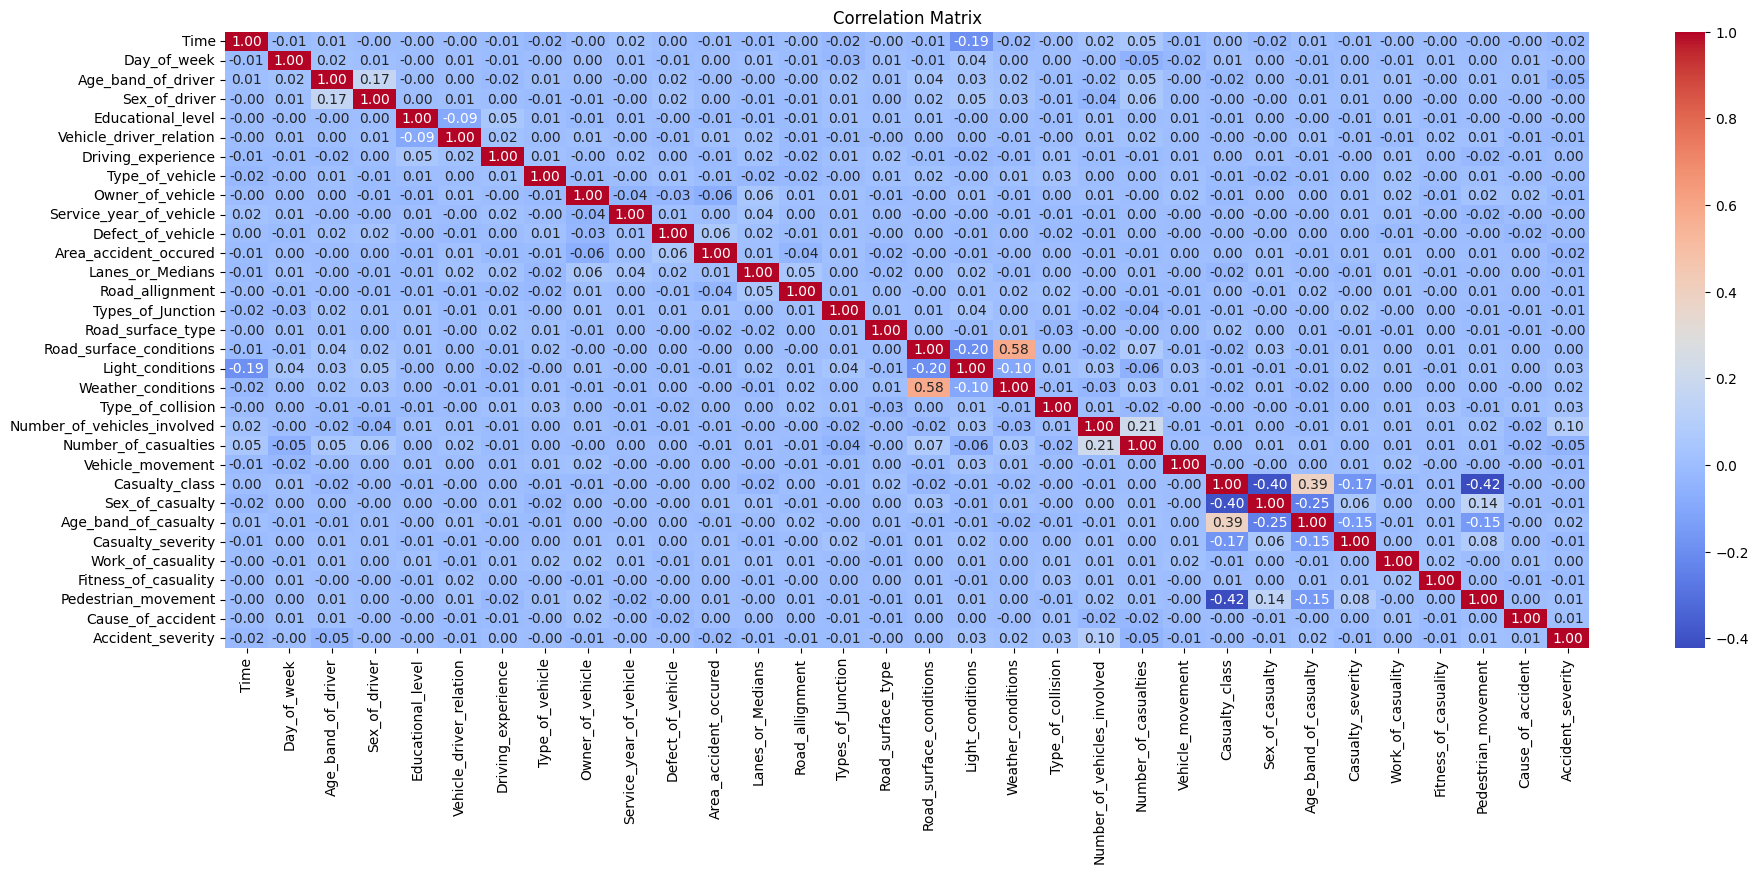

In [72]:
plt.figure(figsize=(22, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [73]:
# Get absolute correlation values
abs_corr = df.corr().abs()

# Unstack and sort
sorted_corr = abs_corr.unstack().sort_values(ascending=False)

# Filter out self-correlations (i.e., correlations with themselves)
sorted_corr = sorted_corr[sorted_corr < 1]

# Get top 10 correlations
top_10_corr = sorted_corr.head(10)
print("Top 10 Correlations:")
print(top_10_corr)


Top 10 Correlations:
Road_surface_conditions  Weather_conditions         0.581044
Weather_conditions       Road_surface_conditions    0.581044
Pedestrian_movement      Casualty_class             0.421851
Casualty_class           Pedestrian_movement        0.421851
                         Sex_of_casualty            0.399088
Sex_of_casualty          Casualty_class             0.399088
Age_band_of_casualty     Casualty_class             0.393328
Casualty_class           Age_band_of_casualty       0.393328
Sex_of_casualty          Age_band_of_casualty       0.247152
Age_band_of_casualty     Sex_of_casualty            0.247152
dtype: float64


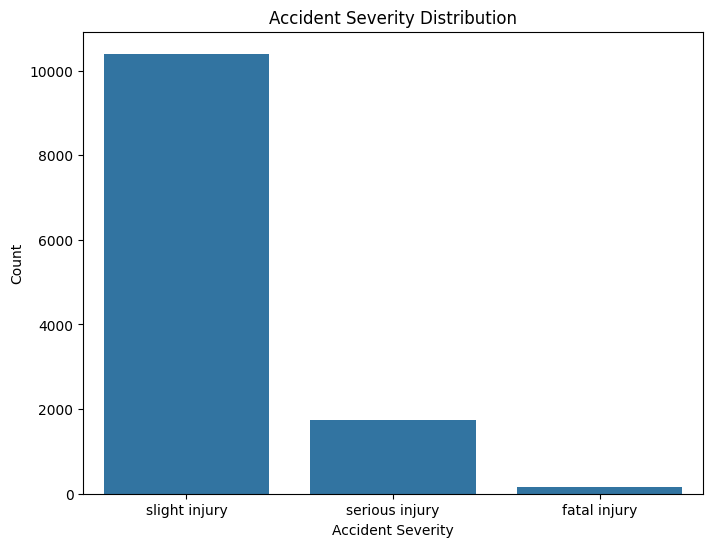

In [32]:
# barplot of accident severity
plt.figure(figsize=(8, 6))
sns.countplot(x='Accident_severity', data=df)
plt.title('Accident Severity Distribution')
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.show()


Text(0.5, 0, 'Sex of Driver')

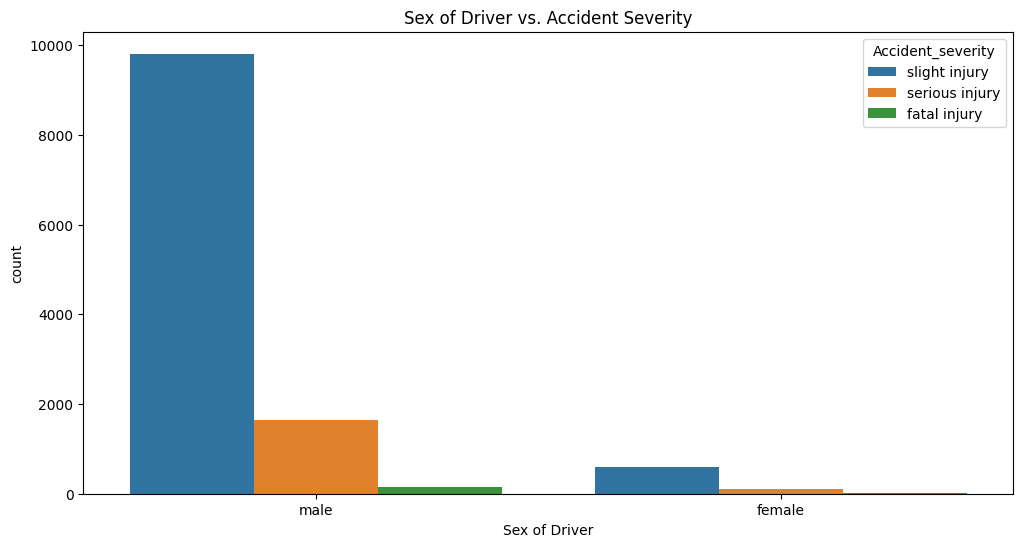

In [33]:
# barplot for 2 variable
plt.figure(figsize=(12, 6))
sns.countplot(x='Sex_of_driver', hue='Accident_severity', data=df)
plt.title('Sex of Driver vs. Accident Severity')
plt.xlabel('Sex of Driver')

Text(0.5, 0, 'Day of week')

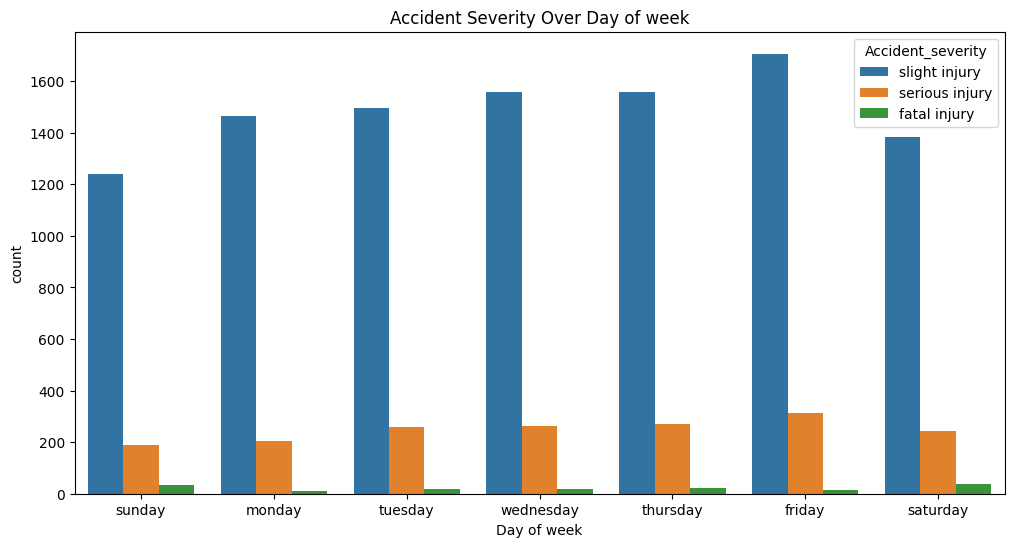

In [63]:
day_order = ['sunday', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday']
plt.figure(figsize=(12, 6))
sns.countplot(x='Day_of_week', hue='Accident_severity', data=df, order=day_order)
plt.title('Accident Severity Over Day of week')
plt.xlabel('Day of week')


Text(0.5, 0, 'Age')

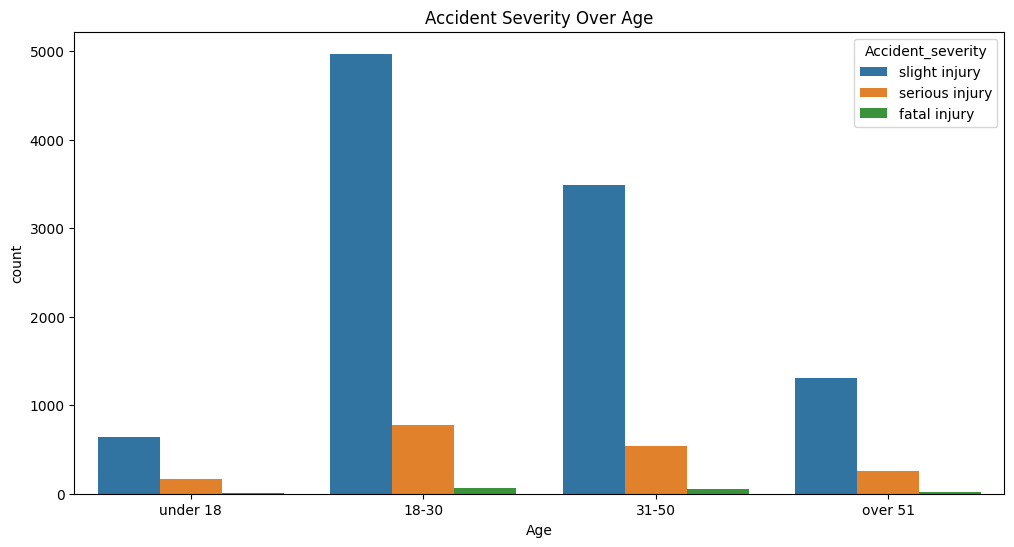

In [62]:
age_order = ['under 18', '18-30', '31-50', 'over 51']
plt.figure(figsize=(12, 6))
sns.countplot(x='Age_band_of_driver', hue='Accident_severity', data=df, order=age_order)
plt.title('Accident Severity Over Age')
plt.xlabel('Age')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'automobile'),
  Text(1, 0, 'lorry (41?100q)'),
  Text(2, 0, 'other'),
  Text(3, 0, 'pick up upto 10q'),
  Text(4, 0, 'public (12 seats)'),
  Text(5, 0, 'stationwagen'),
  Text(6, 0, 'lorry (11?40q)'),
  Text(7, 0, 'public (13?45 seats)'),
  Text(8, 0, 'public (> 45 seats)'),
  Text(9, 0, 'long lorry'),
  Text(10, 0, 'taxi'),
  Text(11, 0, 'motorcycle'),
  Text(12, 0, 'special vehicle'),
  Text(13, 0, 'ridden horse'),
  Text(14, 0, 'turbo'),
  Text(15, 0, 'bajaj'),
  Text(16, 0, 'bicycle')])

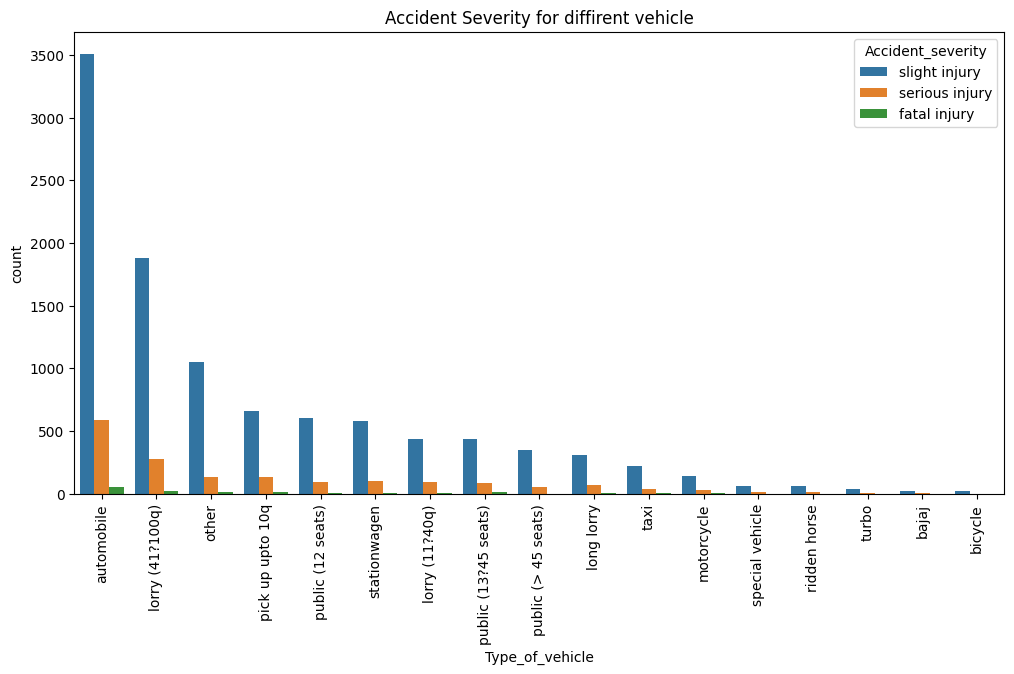

In [53]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Type_of_vehicle', hue='Accident_severity', data=df, order=df['Type_of_vehicle'].value_counts().index)
plt.title('Accident Severity for diffirent vehicle')
plt.xlabel('Type_of_vehicle')
plt.xticks(rotation=90)

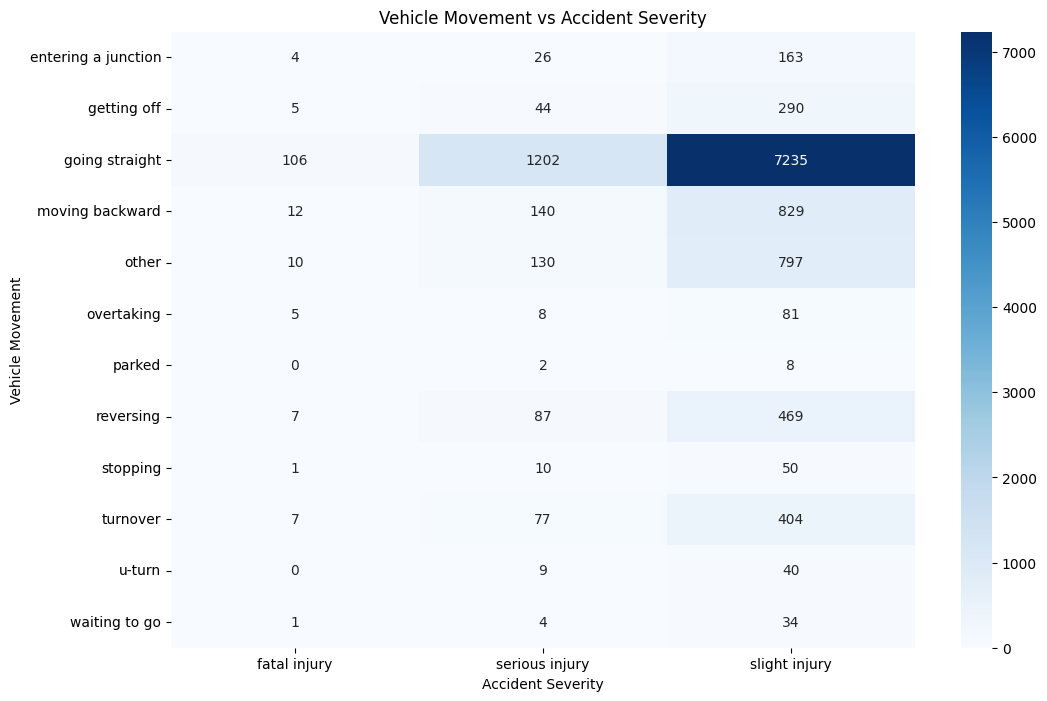

In [49]:
ct = pd.crosstab(df['Vehicle_movement'], df['Accident_severity'])

plt.figure(figsize=(12, 8))
sns.heatmap(ct, annot=True, cmap='Blues', fmt='d')
plt.title('Vehicle Movement vs Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Vehicle Movement')
plt.show()

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [74]:

X = df.drop(['Accident_severity',"Time"], axis=1)
y = df['Accident_severity']

# Divide the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [75]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

#### Decision Tree Classifier

In [76]:
# Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree_clf = tree_clf.predict(X_test)

#### Support Vector Machine (SVM)

In [77]:
# Support Vector Machine (SVM)
svm_clf = SVC(probability=True, random_state=42)
svm_clf.fit(X_train, y_train)
y_pred_svm_clf = svm_clf.predict(X_test)

#### K-Neighbors Classifier

In [78]:
# K-Neighbors Classifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_pred_knn_clf = knn_clf.predict(X_test)

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

In [79]:
# Evaluate model function
def evaluate_model(y_test, y_pred, model_name):
    print(f"Evaluation Metrics for {model_name}")
    con = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Confusion Matrix:\n{con}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}\n")

    return acc, prec, rec, f1

# Evaluate each model
acc_log_reg, prec_log_reg, rec_log_reg, f1_log_reg = evaluate_model(y_test, y_pred_log_reg, "Logistic Regression")
acc_tree_clf, prec_tree_clf, rec_tree_clf, f1_tree_clf = evaluate_model(y_test, y_pred_tree_clf, "Decision Tree Classifier")
acc_svm_clf, prec_svm_clf, rec_svm_clf, f1_svm_clf = evaluate_model(y_test, y_pred_svm_clf, "Support Vector Machine (SVM)")
acc_knn_clf, prec_knn_clf, rec_knn_clf, f1_knn_clf = evaluate_model(y_test, y_pred_knn_clf, "K-Neighbors Classifier")

# Collect performance metrics for all models
models = ['Logistic Regression', 'Decision Tree Classifier', 'Support Vector Machine (SVM)', 'K-Neighbors Classifier']
metrics = {
    'Model': models,
    'Accuracy': [acc_log_reg, acc_tree_clf, acc_svm_clf, acc_knn_clf],
    'Precision': [prec_log_reg, prec_tree_clf, prec_svm_clf, prec_knn_clf],
    'Recall': [rec_log_reg, rec_tree_clf, rec_svm_clf, rec_knn_clf],
    'F1 Score': [f1_log_reg, f1_tree_clf, f1_svm_clf, f1_knn_clf]
}

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


Evaluation Metrics for Logistic Regression
Confusion Matrix:
[[   0    0   29]
 [   0    0  361]
 [   0    0 2070]]
Accuracy: 0.8415
Precision: 0.7081
Recall: 0.8415
F1 Score: 0.7690

Evaluation Metrics for Decision Tree Classifier
Confusion Matrix:
[[   2    2   25]
 [   9   79  273]
 [  29  302 1739]]
Accuracy: 0.7398
Precision: 0.7492
Recall: 0.7398
F1 Score: 0.7444

Evaluation Metrics for Support Vector Machine (SVM)
Confusion Matrix:
[[   0    0   29]
 [   0    0  361]
 [   0    0 2070]]
Accuracy: 0.8415
Precision: 0.7081
Recall: 0.8415
F1 Score: 0.7690

Evaluation Metrics for K-Neighbors Classifier
Confusion Matrix:
[[   0    1   28]
 [   0   27  334]
 [   2   53 2015]]
Accuracy: 0.8301
Precision: 0.7622
Recall: 0.8301
F1 Score: 0.7805

                          Model  Accuracy  Precision    Recall  F1 Score
0           Logistic Regression  0.841463   0.708061  0.841463  0.769020
1      Decision Tree Classifier  0.739837   0.749221  0.739837  0.744438
2  Support Vector Machine (S

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

In [80]:
# Analysis of Results

# Compare Metrics:
# - Logistic Regression and SVM are similar, with accuracy and F1 scores around 0.84 and 0.77.
# - Decision Tree has the lowest accuracy at 0.74 but slightly better precision.
# - K-Neighbors Classifier has the highest F1 score at 0.78, showing a good balance of precision and recall.

# Evaluate Trade-offs:
# - Logistic Regression and SVM are efficient but might miss complex patterns.
# - Decision Tree is easy to understand but can overfit. K-Neighbors is accurate but can be slow with large datasets.

# Justify Your Choice:
# - K-Neighbors Classifier is recommended for its high F1 score, though it may be slower with large datasets.

# Feature Importance:
# - Decision Trees show clear feature importance. For Logistic Regression and SVM, we use coefficients to understand feature impact.

# Model Limitations:
# - Logistic Regression and SVM may struggle with non-linear data.
# - Decision Trees can overfit without tuning.
# - K-Neighbors may be slow and less effective with high-dimensional data.
# - SVM take alots of time to train the data.

# Future Improvements:
# - Try tuning hyperparameters.
# - Experiment with different algorithms and features.
# - Use cross-validation for better performance insights.
# - Address any data imbalance if needed.
